In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [31]:
#upload the csv file
df = pd.read_csv('players_22.csv', low_memory = False)
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [32]:
#select the column
df = df[['short_name','age','nationality_name','overall','potential','club_name'
        ,'value_eur','player_positions']]
df.head()

,short_name,age,nationality_name,overall,potential,club_name,value_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,"RW, ST, CF"
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,"ST, LW"
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,"LW, CAM"
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,"CM, CAM"


In [33]:
#select just one position if the players has more than one
df['player_positions'] = df['player_positions'].str.split(',',expand=True)[0]

#drop the NaN column
df.dropna(inplace=True)

In [58]:
#delete the player who miss the the world cup 2022
player_missing_wc2022 = ['K. Benzema','S. Mané','S. Agüero', 'Sergio Ramos', 'P. Pogba',
                        'M. Reus', 'Diogo Jota', 'N. Kanté', 'Piqué']
#drop the injuring player
drop_index = df[df['short_name'].isin(player_missing_wc2022)].index
df.drop(drop_index, axis=0, inplace=True)

In [35]:
#create an array of club who partecipate in WC2022, then filter the Nationality name with the Team WC2022
teams_worldcup = [
    'Qatar', 'Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Spain', 'Portugal',
    'Mexico', 'Netherlands', 'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'United States', 'Croatia',
    'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia',
    'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Australia']

df = df[df['nationality_name'].isin(teams_worldcup)]

In [36]:
#Best Players
df.sort_values(by=['overall','potential','value_eur'], ascending=False, inplace=True)
df.head(15)

,short_name,age,nationality_name,overall,potential,club_name,value_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,ST
6,K. Mbappé,22,France,91,95,Paris Saint-Germain,194000000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,CM
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,ST
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,GK
9,H. Kane,27,England,90,90,Tottenham Hotspur,129500000.0,ST
7,M. Neuer,35,Germany,90,90,FC Bayern München,13500000.0,GK
18,Ederson,27,Brazil,89,91,Manchester City,94000000.0,GK


## Distribution of players overall

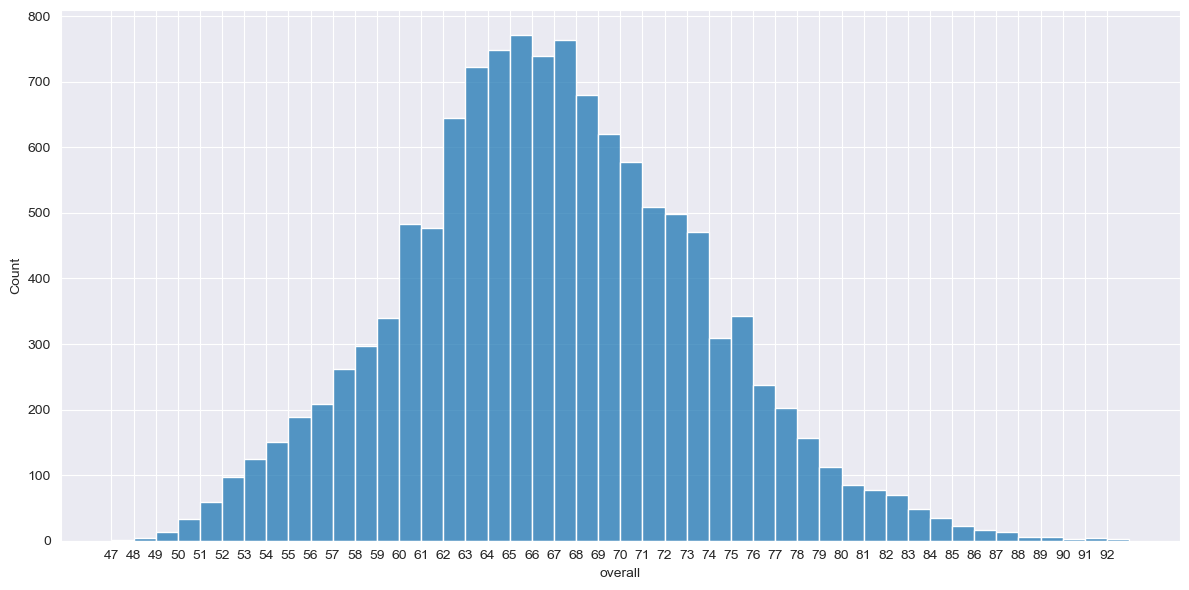

In [39]:
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
sns.histplot(df, x='overall', binwidth=1)

bins = np.arange(df['overall'].min(), df['overall'].max(), 1)
plt.xticks(bins)
plt.show()

## Dream Team World Cup Players
### Create a Team with the best player of the world cup

In [40]:
df.drop_duplicates('player_positions')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,CM
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,GK
19,J. Kimmich,26,Germany,89,90,FC Bayern München,108000000.0,CDM
15,V. van Dijk,29,Netherlands,89,89,Liverpool,86000000.0,CB
28,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,CAM
44,T. Alexander-Arnold,22,England,87,92,Liverpool,114000000.0,RB
45,J. Sancho,21,England,87,91,Manchester United,116500000.0,RM


## Most Skillfull player on each National team

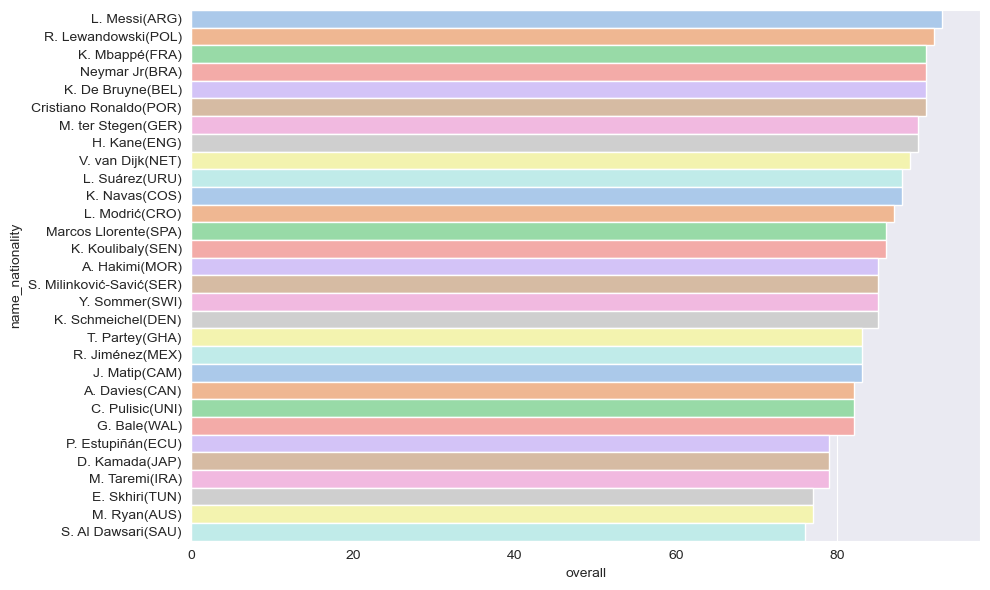

In [54]:
df_best_player = df.copy()
df_best_player = df_best_player.drop_duplicates('nationality_name').reset_index(drop=True)
country_short = df_best_player['nationality_name'].str.extract('(^\w{3})', expand=False).str.upper()
df_best_player['name_nationality'] = df_best_player['short_name'] + '('+ country_short +')'

fix, ax = plt.subplots(figsize=(10,6), tight_layout=True) #tight_layout adjust the padding between and around subplots.

sns.barplot(df_best_player, x='overall', y='name_nationality', palette=sns.color_palette('pastel'), width=1)

plt.show()

## Choose the best squad per team

In [73]:
#define a function best_squad that select the best player per team

def best_squad(nationality):
    df_best_squad = df.copy()
    df_best_squad = df_best_squad.groupby(['nationality_name','player_positions']).head(1)
    df_best_squad = df_best_squad[df_best_squad['nationality_name']==nationality].sort_values(['overall',
                                                                                               'player_positions',
                                                                                               'potential'], ascending=False)
    return df_best_squad

In [74]:
best_squad('Argentina')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,RW
41,P. Dybala,27,Argentina,87,88,Juventus,93000000.0,CF
93,L. Martínez,23,Argentina,85,89,Inter,78000000.0,ST
69,A. Gómez,33,Argentina,85,85,Sevilla FC,33500000.0,CAM
134,M. Acuña,29,Argentina,84,84,Sevilla FC,37000000.0,LB
113,E. Martínez,28,Argentina,84,85,Aston Villa,33500000.0,GK
171,L. Ocampos,26,Argentina,83,83,Sevilla FC,39500000.0,LW
247,R. De Paul,27,Argentina,82,83,Atlético de Madrid,35000000.0,CM
206,É. Banega,33,Argentina,82,82,Al Shabab,15000000.0,CDM
269,C. Romero,23,Argentina,82,87,Tottenham Hotspur,41500000.0,CB


## Best Team by average overall of the players

In [115]:
average_overall = [best_squad(team)['overall'].mean() for team in teams_worldcup]

df_average_overall = pd.DataFrame({'Teams':teams_worldcup, 'AVG Overall':average_overall})
df_average_overall = df_average_overall.dropna()
df_average_overall = df_average_overall.sort_values('AVG Overall', ascending = False)

df_average_overall.head(10)

,Teams,AVG Overall
6,Spain,83.666667
5,England,83.533333
7,Portugal,83.200000
1,Brazil,83.066667
3,France,82.600000
4,Argentina,82.200000
11,Germany,81.933333
2,Belgium,81.133333
9,Netherlands,80.733333
8,Mexico,78.909091


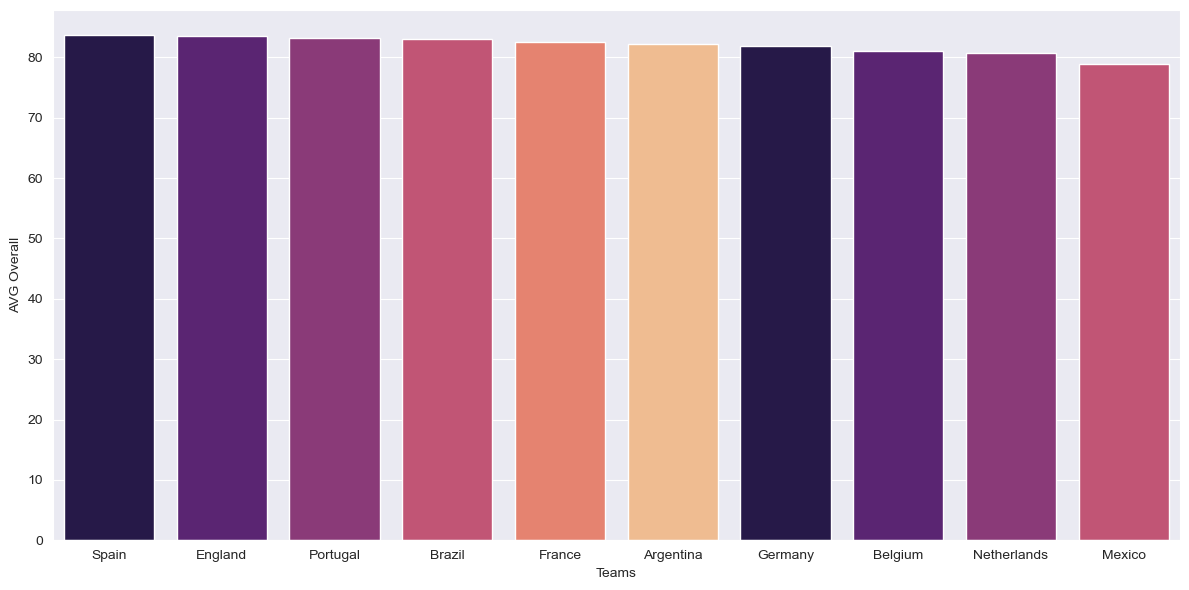

In [77]:
#plot the firts 10 Average overall teams

fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)

sns.barplot(df_average_overall[:10], x='Teams', y='AVG Overall', palette = sns.color_palette('magma'))

plt.show()

## Best formation and line-up for each team

In [111]:
def best_lineup(nationality, lineup):
    lineup_count = [lineup.count(i) for i in lineup]
    
    df_lineup = pd.DataFrame({'position':lineup, 'count':lineup_count})
    positions_non_repeated = df_lineup[df_lineup['count'] <= 1]['position'].values
    positions_repeated = df_lineup[df_lineup['count'] > 1]['position'].values
    
    df_squad = best_squad(nationality)
    
    df_lineup = pd.concat([df_squad[df_squad['player_positions'].isin(positions_non_repeated)].drop_duplicates('player_positions'
                                                                                                               , keep = 'first'),
                           df_squad[df_squad['player_positions'].isin(positions_repeated)]])
    
    return df_lineup[['short_name', 'overall', 'club_name', 'player_positions']]


In [112]:
#set the formations
dict_formation = {
    '4-3-3': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW'],
    '4-4-2': ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST'],
    '4-2-3-1': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST'],
}

In [113]:
for index, row in df_average_overall[:10].iterrows():
    max_average = None
    for key, values in  dict_formation.items():
        average = best_lineup(row['Teams'], values)['overall'].mean()
        if max_average is None or average > max_average:
            max_average = average
            formation = key
            
    print(row['Teams'], formation, max_average)

Spain 4-2-3-1 85.42857142857143
England 4-2-3-1 85.14285714285714
Portugal 4-2-3-1 85.71428571428571
Brazil 4-2-3-1 85.0
France 4-2-3-1 84.71428571428571
Argentina 4-3-3 83.8
Germany 4-2-3-1 84.57142857142857
Belgium 4-3-3 82.8
Netherlands 4-4-2 82.375
Mexico 4-4-2 79.0


In [114]:
#best_lineup('Spain', dict_formation['4-2-3-1'])
best_lineup('Argentina', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
0,L. Messi,93,Paris Saint-Germain,RW
93,L. Martínez,85,Inter,ST
69,A. Gómez,85,Sevilla FC,CAM
134,M. Acuña,84,Sevilla FC,LB
113,E. Martínez,84,Aston Villa,GK
171,L. Ocampos,83,Sevilla FC,LW
247,R. De Paul,82,Atlético de Madrid,CM
206,É. Banega,82,Al Shabab,CDM
818,G. Montiel,78,Sevilla FC,RB
269,C. Romero,82,Tottenham Hotspur,CB
